In [1]:
import pandas as pd
import arcgis
from arcgis.gis import GIS
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
%matplotlib inline
import numpy as np
from scipy.special import erf
import arcgis
arcgis.env.out_spatial_reference = 4326
from IPython.display import display

In [10]:
# eda_df['waterpoint_type', 'extraction_type_class', 'management', 'management_group', 'payment', 
#             'quality_group', 'quantity', 'basin', 'region', 'source', 'source_class', 'status_group']

In [16]:
map_df = pd.read_csv('./Datasets/clean_train_data.csv')
map_df_stat = pd.read_csv('./Datasets/Training_labels.csv')

In [17]:
map_df_stat.shape

(59400, 2)

In [18]:
map_df.shape

(59400, 27)

In [19]:
map_df_stat.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [20]:
map_df.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,...,extraction_type_class,management,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,...,gravity,vwc,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,...,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,...,gravity,vwc,user-group,pay per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,...,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,...,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [21]:
# create a dataframe in order to map water pumps using ArcGIS
map_df1 = map_df[['id', 'latitude', 'longitude', 'status_group']]
map_df1.head()

,id,latitude,longitude,status_group
0,69572,-9.856322,34.938093,functional
1,8776,-2.147466,34.698766,functional
2,34310,-3.821329,37.460664,functional
3,67743,-11.155298,38.486161,non functional
4,19728,-1.825359,31.130847,functional


In [22]:
map_df.to_csv('./mapping.csv')

In [24]:
# seperate new map_df by status group to be mapped.
map_df_fun = map_df1[map_df1['status_group']=='functional']
map_df_fix = map_df1[map_df1['status_group']=='functional needs repair']
map_df_non = map_df1[map_df1['status_group']=='non functional']

In [178]:
map_df_fun.to_csv('./functional.csv')

In [179]:
map_df_fix.to_csv('./fun_to_fix.csv')

In [180]:
map_df_non.to_csv('./non_functional.csv')

In [25]:
gis = GIS('https://www.arcgis.com', 'politicalfishing', 'pass84GIS')

In [26]:
toolboxes = gis.content.search('travel', 'Geoprocessing Toolbox', 
                               outside_org=True, max_items=3)

In [27]:
map1 = gis.map('Tanzania', zoomlevel=5)

In [28]:
map1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [29]:
map1.center

[-6.438400132999959, 34.995322712000075]

In [56]:
map1

In [57]:
portal_gis = GIS("https://gapf.maps.arcgis.com", "politicalfishing", "pass84GIS")
non_pumps = portal_gis.content.search("non_functional", "Feature Layer")
fun_pumps = portal_gis.content.search("functional", "Feature Layer")
fix_pumps = portal_gis.content.search("fun_to_fix (1)", "Feature Layer")

In [54]:
fun_pumps[0]

<Item title:"Summarize non_functional in functional" type:Feature Layer Collection owner:politicalfishing>

In [58]:
map1.add_layer(non_pumps[0])
map1.add_layer(fun_pumps[0])
map1.add_layer(fix_pumps[0])

In [20]:
func = pd.read_csv('.//Submissions/Submission_8.csv')

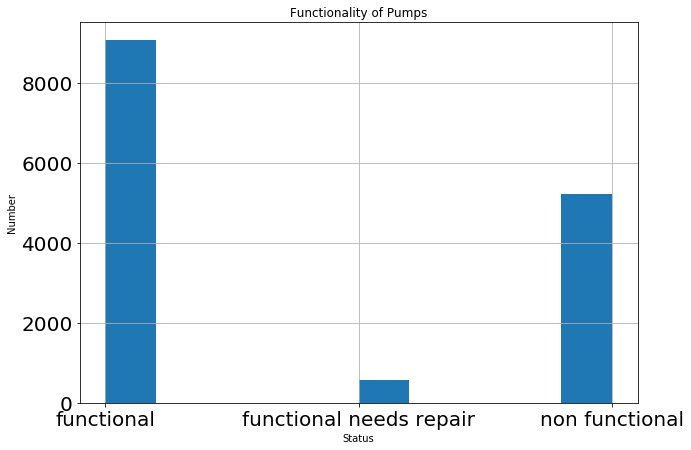

In [26]:
func['status_group'].hist(figsize=(10,7))
plt.xlabel('Status')
plt.ylabel('Number')
plt.title('Functionality of Pumps')
plt.rc('xtick', labelsize = 20) 
plt.rc('ytick', labelsize = 20) 

In [160]:
func['status_group'].value_counts()

functional                 9253
non functional             5105
functional needs repair     492
Name: status_group, dtype: int64